# Proyecto Bibliométrico

A continuación se importan los paquetes requeridos y la muestra bibliométrica de 100 artículos. Guaramos estos datos en un datafram de pandas llamado _muestra_.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


muestra = pd.read_csv("Muestra.csv")

Las primeras entradas y las columnas del datafram se muestran a continuación

In [75]:
muestra.head()

,Authors,Author full names,Author(s) ID,Title,Year,Cited by,DOI,Link,EID
0,Croton D.J.; Springel V.; White S.D.M.; De Luc...,"Croton, Darren J. (6506894822); Springel, Volk...",6506894822; 7003307156; 16199171600; 660252153...,The many lives of active galactic nuclei: Cool...,2006,2929,10.1111/j.1365-2966.2005.09675.x,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-33644761468
1,Georgescu I.M.; Ashhab S.; Nori F.,"Georgescu, I.M. (57523273800); Ashhab, S. (140...",57523273800; 14017601400; 7005721141,Quantum simulation,2014,1631,10.1103/RevModPhys.86.153,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-84897095980
2,Barthelmy S.D.; Barbier L.M.; Cummings J.R.; F...,"Barthelmy, Scott D. (7004253793); Barbier, Lou...",7004253793; 7004787437; 7402590967; 7005253057...,The burst alert telescope (BAT) on the SWIFT m...,2005,1402,10.1007/s11214-005-5096-3,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-29344432604
3,Preskill J.; Wise M.B.; Wilczek F.,"Preskill, John (6701594380); Wise, Mark B. (72...",6701594380; 7202820840; 7004411418,Cosmology of the invisible axion,1983,2082,10.1016/0370-2693(83)90637-8,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-0008416057
4,Elbaz D.; Daddi E.; Le Borgne D.; Dickinson M....,"Elbaz, D. (7004027767); Daddi, E. (6603916088)...",7004027767; 6603916088; 6602776924; 3541910260...,The reversal of the star formation-density rel...,2007,1244,10.1051/0004-6361:20077525,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-34250211491


In [7]:
muestra.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Cited by', 'DOI', 'Link', 'EID'],
      dtype='object')

## Análisis

Con la muestra de 100 artículos, lo primero que hacmeos es estudiar el número de autores en cada paper y los ordenaremos por año. De este modo, debemos encontrar el número de autores en cada entrada, para ello usamos lo siguiente:

In [8]:
len(muestra.loc[1,'Author(s) ID'].split() )

3

Veamos que esto de hecho nos da el número de autores:

In [9]:
muestra.loc[1,'Authors']

'Georgescu I.M.; Ashhab S.; Nori F.'

Ahora, hagamos lo mismo con todas las entradas y creemos una nueva columna que asigne estos valoes a cada entrada:

In [76]:
NumAuthors = np.zeros(len(muestra))

for i in range(len(muestra)):
    NumAuthors[i] = len(muestra.loc[i,'Author(s) ID'].split() ) 
muestra['Number of Authors'] = NumAuthors

muestra['Number of Authors']

0     10.0
1      3.0
2     15.0
3      3.0
4     14.0
      ... 
95    73.0
96     4.0
97    15.0
98     4.0
99     2.0
Name: Number of Authors, Length: 100, dtype: float64

Algunas estadísticas breves que podemos visualizar numéricamente

In [11]:
muestra['Number of Authors'].describe()

count     100.000000
mean       39.970000
std       125.754648
min         1.000000
25%         3.000000
50%         8.000000
75%        22.000000
max      1124.000000
Name: Number of Authors, dtype: float64

In [12]:
muestra['Number of Authors'].value_counts()

2.0       12
3.0       11
1.0        9
4.0        7
21.0       6
6.0        5
15.0       4
22.0       4
8.0        4
7.0        4
19.0       3
48.0       2
9.0        2
10.0       2
24.0       2
28.0       2
124.0      1
64.0       1
70.0       1
65.0       1
63.0       1
1124.0     1
5.0        1
45.0       1
14.0       1
40.0       1
400.0      1
181.0      1
20.0       1
32.0       1
264.0      1
261.0      1
29.0       1
17.0       1
246.0      1
107.0      1
73.0       1
Name: Number of Authors, dtype: int64

In [77]:
muestra['Number of Authors'] = muestra['Number of Authors'].replace(np.arange(21, 1125, 1), 20)

O gráficamente

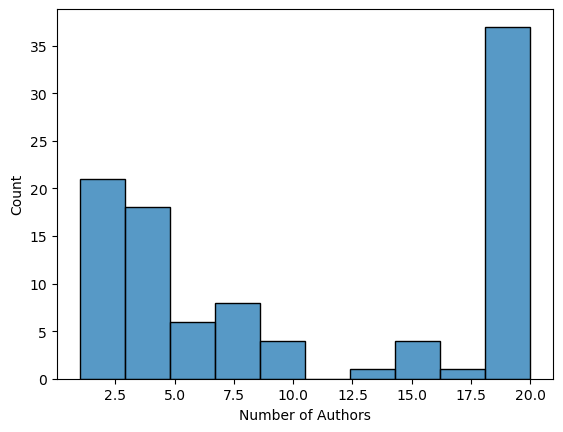

In [78]:
sns.histplot(data=muestra['Number of Authors'], bins=10)

plt.show()

Y ahora, finalmente, hagamos un scatter plot del número de autore y el año, para ver cuántos autores máximo se van obteniendo por año

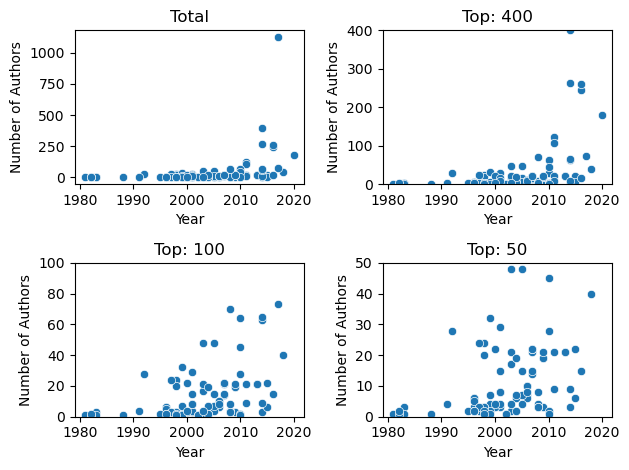

In [14]:
plt.subplot(2, 2, 1)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Total')


plt.subplot(2, 2, 2)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Top: 400')
plt.ylim(bottom=0, top=400)

plt.subplot(2, 2, 3)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Top: 100')
plt.ylim(bottom=0, top=100)

plt.subplot(2, 2, 4)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Top: 50')
plt.ylim(bottom=0, top=50)


plt.tight_layout()
plt.show()


Ya con este plot, se puede ver a diferentes escalas que el número de autores tiende a aumentar a lo largo del tiempo, en el período 1980-2020.

Ahora, quisieramos ver el número de artículos de solamente 1 autor, en el mismo período de tiempo.

In [30]:
muestra['One Author'] = (muestra['Number of Authors'] == 1)
muestra['One Author'].value_counts()

False    91
True      9
Name: One Author, dtype: int64

In [34]:
muestra.loc[:,['Year', 'One Author']].value_counts()

Year  One Author
1996  False         7
2001  False         6
2014  False         6
1998  False         5
2006  False         5
2004  False         5
2003  False         5
2008  False         5
2007  False         5
2011  False         4
1999  False         4
2010  False         4
2009  False         4
2005  False         4
1997  False         3
2000  False         3
2016  False         3
2013  False         2
2015  False         2
2017  False         2
2002  True          2
2010  True          1
2018  False         1
1981  True          1
1982  False         1
1999  True          1
1998  True          1
1995  False         1
1992  False         1
1991  False         1
1988  True          1
1983  True          1
      False         1
1982  True          1
2020  False         1
dtype: int64

In [38]:
SingleAuthorYears = muestra.loc[muestra['One Author'], 'Year']

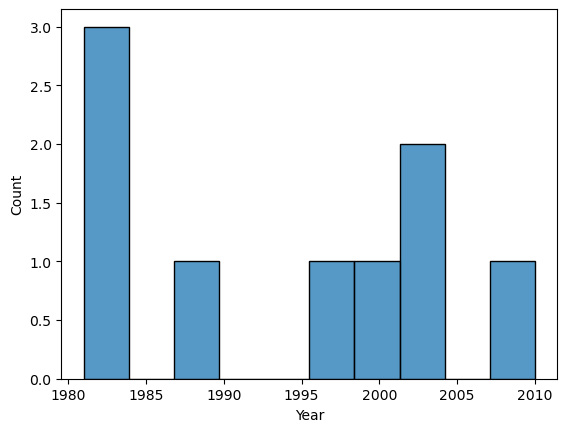

In [40]:
sns.histplot(data = SingleAuthorYears, bins=10)
plt.show()

Ahora tomemos algunos Boxplots para hacer estadísticas globales.

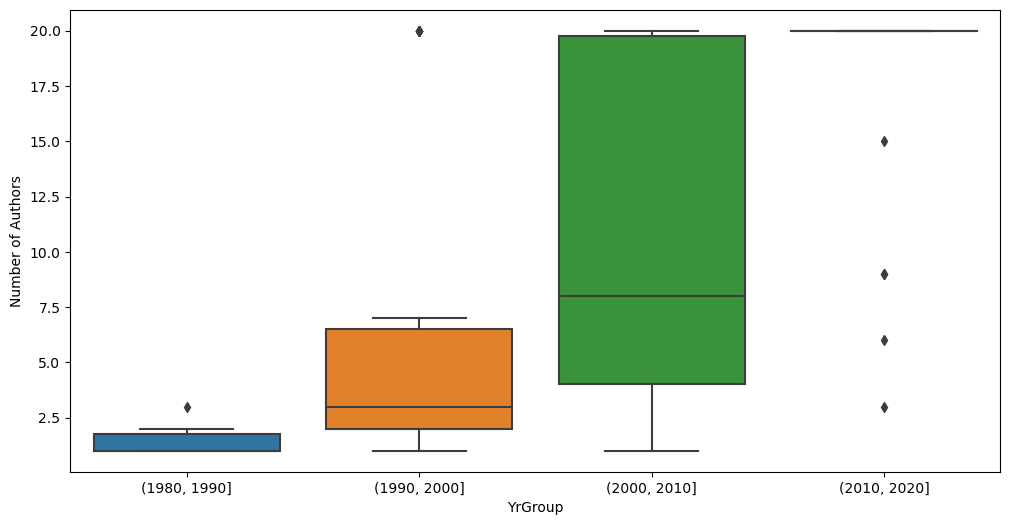

In [80]:
muestra["YrGroup"] = pd.cut(muestra['Year'], [1980, 1990, 2000, 2010, 2020])
plt.figure(figsize=(12, 6)) 
sns.boxplot(x="YrGroup", y="Number of Authors", data=muestra)
#plt.ylim([0,400])
plt.show()


### Citations

In [83]:
muestra['Year']==2006



0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Year, Length: 100, dtype: bool